In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist


### Examine Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


In [4]:
x_train = x_train / 255
x_test = x_test / 255

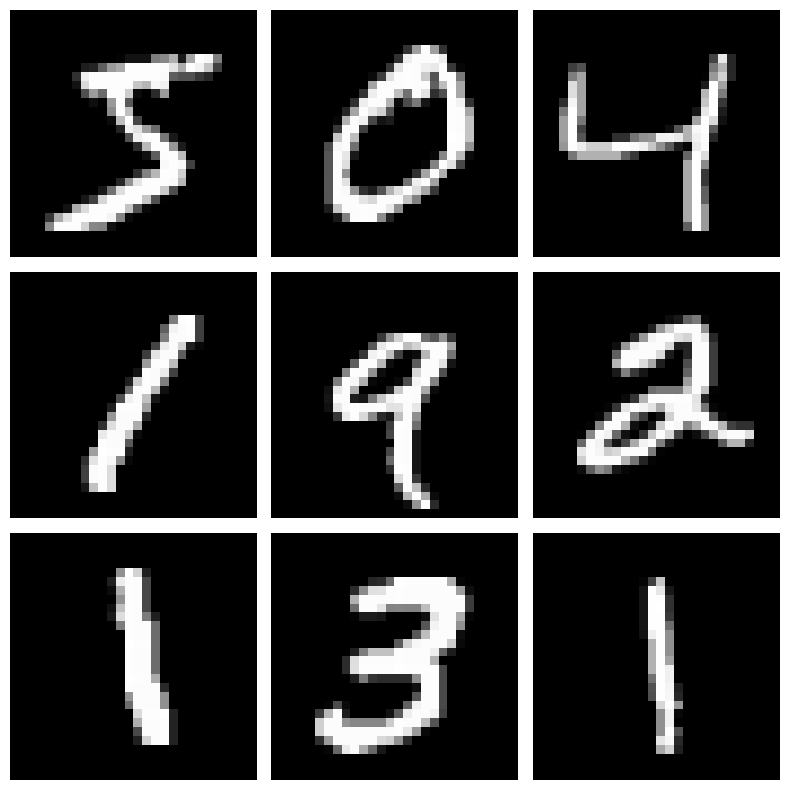

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Simple Tensorflow Neural Net

In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50


2023-06-29 14:46:42.359206: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.2496 - accuracy: 0.9290 - val_loss: 0.1306 - val_accuracy: 0.9614
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1103 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9708
Epoch 3/50
1875/1875 [==============================] - 2s 848us/step - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.0833 - val_accuracy: 0.9745
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0975 - val_accuracy: 0.9702
Epoch 5/50
1875/1875 [==============================] - 2s 997us/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0731 - val_accuracy: 0.9775
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0742 - val_accuracy: 0.9765
Epoch 7/50
1875/1875 [==============================] - 2s 819us/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0710 - val_accuracy: 0.97

In [60]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")

313/313 [==============================] - 0s 461us/step - loss: 0.1728 - accuracy: 0.9771
Test Loss: 0.173
Test Accuracy: 0.977


In [61]:
model.save("cnns/simple_keras_nn")

INFO:tensorflow:Assets written to: models/simple_keras_nn/assets


### Using a CNN

In [63]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load MNIST dataset and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
num_classes = 10

# Create the model
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = cnn.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/10
469/469 [==============================] - 22s 46ms/step - loss: 0.3686 - accuracy: 0.8820 - val_loss: 0.0644 - val_accuracy: 0.9805
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1172 - accuracy: 0.9642 - val_loss: 0.0396 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0884 - accuracy: 0.9743 - val_loss: 0.0347 - val_accuracy: 0.9895
Epoch 4/10
469/469 [==============================] - 26s 54ms/step - loss: 0.0748 - accuracy: 0.9774 - val_loss: 0.0301 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0670 - accuracy: 0.9803 - val_loss: 0.0286 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0600 - accuracy: 0.9820 - val_loss: 0.0258 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 19s 39ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0238 - val_accuracy:

In [79]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [64]:
cnn.save("models/cnn")

2023-06-29 15:17:51.475217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2023-06-29 15:17:51.483759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2023-06-29 15:17:51.492603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-06-

INFO:tensorflow:Assets written to: models/cnn/assets


INFO:tensorflow:Assets written to: models/cnn/assets


In [83]:
import visualkeras 

visualkeras.layered_view(model).show()

ModuleNotFoundError: No module named 'visualkeras'

### Testing On Drawn Digits

In [65]:
from PIL import Image

# Open the original image
original_image = Image.open("../images/my-drawing.png")
print(original_image)

# Resize the image to 28x28 using bilinear interpolation
image = original_image.resize((28, 28), resample=Image.BILINEAR)
image.show()
print(image)

img = np.array(image)
print(img.shape)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1120x738 at 0x2942F8C90>
<PIL.Image.Image image mode=RGBA size=28x28 at 0x282353990>
(28, 28, 4)


First we must process an image. We get it as a PIL object and convert it to greyscale (going from shape (x, y, 4) in RGBA to (x, y)). Then, we resize the image to be of size (28, 28) using PIL's resize function and convert the PIL object to a numpy array. The cnn was trained on inversed images (background is black, digits are white) so we invert the images. We normalize them to tak evalues between 0 and 1. We then reshape this into a (1, 28, 28) tensor so that our cnn can handle this data.

In [7]:
def process_from_url(url):
    img = Image.open(url).convert("L")
    img = img.resize((28, 28), resample=Image.BILINEAR)
    img = np.array(img)
    img = np.ones((28, 28)) * 255 - img
    img = img / 255
    img = np.reshape(img, (1, 28, 28))
    return img

Here are partially processed images that allows us to see what the images being fed into the neural network look like. Perhaps some flaws in the network's predictions come from these being off center? Consider addressing this by somehow centering the images, or by training on synthetic data. It does seem to process the images pretty well tho, so there aren't any noticeable problems that arise from resizing the images.

In [8]:
def partially_process(url):
    img = Image.open(url).convert("L")
    img = img.resize((28, 28), resample=Image.BILINEAR)
    img = np.array(img)
    img = np.ones((28, 28)) * 255 - img
    return img

In [36]:
def shrink_image(img):
    while np.sum(img[0]) == 0:
        img = img[1:]
    while np.sum(img[:, 0]) == 0:
        img = np.delete(img, 0, 1)
    while np.sum(img[-1]) == 0:
        img = img[:-1]
    while np.sum(img[:, -1]) == 0:
        img = np.delete(img, -1, 1)
    return img

In [50]:
def resize_image(image, target_size):
    pil_image = Image.fromarray(image)
    resized_image = pil_image.resize(target_size)
    resized_array = np.array(resized_image)

    return resized_array

In [52]:
def add_padding(image, target_size):
    rows, cols = image.shape
    target_rows, target_cols = target_size
    
    pad_row = (target_rows - rows) // 2
    pad_col = (target_cols - cols) // 2
    
    padded_image = np.zeros(target_size)
    padded_image[pad_row:pad_row+rows, pad_col:pad_col+cols] = image
    
    return padded_image

In [22]:
def find_center_of_mass(image):
    rows, cols = image.shape
    total_mass = np.sum(image)
    row_indices, col_indices = np.indices((rows, cols))
    
    center_row = np.sum(row_indices * image) / total_mass
    center_col = np.sum(col_indices * image) / total_mass
    
    return center_row, center_col

In [23]:
def center_image(image):
    rows, cols = image.shape
    center_row, center_col = find_center_of_mass(image)
    
    shift_row = rows // 2 - int(center_row)
    shift_col = cols // 2 - int(center_col)
    
    centered_image = np.roll(image, shift_row, axis=0)
    centered_image = np.roll(centered_image, shift_col, axis=1)
    
    return centered_image

In [26]:

zero = partially_process("../images/0.png")
one = partially_process("../images/1.png")
two = partially_process("../images/2.png")
three = partially_process("../images/3.png")
four = partially_process("../images/4.png")
five = partially_process("../images/5.png")
six = partially_process("../images/6.png")
seven = partially_process("../images/7.png")
eight = partially_process("../images/8.png")
nine = partially_process("../images/9.png")
arr = [zero, one, two, three, four, five, six, seven, eight, nine]

for i in arr:
    Image.fromarray(i).show()

In [57]:
five_test = center_image(five)
five_test2 = shrink_image(five)
five_test3 = resize_image(five_test2, (20, 20))
a = center_image(five_test3)
b = add_padding(a, (28, 28))
five_test4 = add_padding(five_test3, (28, 28))
five_test5 = center_image(five_test4)
Image.fromarray(five).show()
Image.fromarray(five_test).show()
Image.fromarray(five_test2).show()
Image.fromarray(five_test3).show()
Image.fromarray(five_test4).show()
Image.fromarray(five_test5).show()
Image.fromarray(b).show()
print(five_test4.shape)

(28, 28)


Testing the model on some manually drawn digits.

In [77]:
zero = process_from_url("../images/0.png")
one = process_from_url("../images/1.png")
two = process_from_url("../images/2.png")
three = process_from_url("../images/3.png")
four = process_from_url("../images/4.png")
five = process_from_url("../images/5.png")
six = process_from_url("../images/6.png")
seven = process_from_url("../images/7.png")
eight = process_from_url("../images/8.png")
nine = process_from_url("../images/9.png")
arr = [zero, one, two, three, four, five, six, seven, eight, nine]

In [78]:
for i in arr:
    print(np.argmax(model.predict(i)))

1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 16ms/step
1
1/1 [==============================] - 0s 14ms/step
2
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 14ms/step
4
1/1 [==============================] - 0s 15ms/step
5
1/1 [==============================] - 0s 16ms/step
6
1/1 [==============================] - 0s 15ms/step
7
1/1 [==============================] - 0s 15ms/step
6
1/1 [==============================] - 0s 14ms/step
9
